# Imports and Initialization
## Import required modules

In [ ]:
!git clone https://github.com/vamsigp/EVA5

Cloning into 'EVA5'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 221 (delta 88), reused 145 (delta 36), pack-reused 0
Receiving objects: 100% (221/221), 14.67 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
%cd EVA5/trainer

/content/EVA5/trainer


In [ ]:
# from models import ResNet18

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from data_engine import DataEngine
from train import train
from test import test
from results import plot_misclassified_images, plot_graph
from utils import *

In [ ]:
from models.resnet import ResNet18

# Model Configuration and Set Seed
### View model configuration and set the seed

In [ ]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.15,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}

CUDA Available


# Data Loading and Visualization
## Preprocess and load the cifar10 dataset. Visualise the dataset.

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
plane   dog  deer  deer


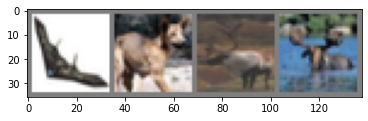

In [ ]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [ ]:
# from resnet.

In [ ]:
device = which_device()
# model = Net(args).to(device)
model = ResNet18().to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

def run():
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  for epoch in range(args.epochs):
      print("EPOCH:", epoch+1)
      train(model, device, data.train_loader, criterion, optimizer, epoch)
      test(model, device, data.test_loader, criterion, data.classes, test_losses, test_accs, misclassified_imgs, epoch==args.epochs-1)
  return test_losses, test_accs, misclassified_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs = run()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9805812239646912 Batch_id=781 Accuracy=49.39: 100%|██████████| 782/782 [01:44<00:00,  7.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0166, Accuracy: 6280/10000 (62.80%)

EPOCH: 2


Loss=1.3964399099349976 Batch_id=781 Accuracy=68.23: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0141, Accuracy: 6916/10000 (69.16%)

EPOCH: 3


Loss=0.5656836628913879 Batch_id=781 Accuracy=76.51: 100%|██████████| 782/782 [01:44<00:00,  7.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0108, Accuracy: 7581/10000 (75.81%)

EPOCH: 4


Loss=0.5013561248779297 Batch_id=781 Accuracy=81.34: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0110, Accuracy: 7590/10000 (75.90%)

EPOCH: 5


Loss=0.7765099406242371 Batch_id=781 Accuracy=84.55: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0106, Accuracy: 7767/10000 (77.67%)

EPOCH: 6


Loss=0.513990044593811 Batch_id=781 Accuracy=87.25: 100%|██████████| 782/782 [01:44<00:00,  7.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 8032/10000 (80.32%)

EPOCH: 7


Loss=0.2791840136051178 Batch_id=781 Accuracy=89.45: 100%|██████████| 782/782 [01:43<00:00,  7.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0105, Accuracy: 7898/10000 (78.98%)

EPOCH: 8


Loss=0.41409796476364136 Batch_id=781 Accuracy=91.05: 100%|██████████| 782/782 [01:44<00:00,  7.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0088, Accuracy: 8213/10000 (82.13%)

EPOCH: 9


Loss=0.41998767852783203 Batch_id=781 Accuracy=93.05: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0106, Accuracy: 7898/10000 (78.98%)

EPOCH: 10


Loss=0.059681572020053864 Batch_id=781 Accuracy=94.15: 100%|██████████| 782/782 [01:44<00:00,  7.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0113, Accuracy: 7881/10000 (78.81%)

EPOCH: 11


Loss=0.04840659722685814 Batch_id=781 Accuracy=95.20: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8156/10000 (81.56%)

EPOCH: 12


Loss=0.16246215999126434 Batch_id=781 Accuracy=96.06: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 8273/10000 (82.73%)

EPOCH: 13


Loss=0.06389272212982178 Batch_id=781 Accuracy=96.77: 100%|██████████| 782/782 [01:44<00:00,  7.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 8176/10000 (81.76%)

EPOCH: 14


Loss=0.38447999954223633 Batch_id=781 Accuracy=97.36: 100%|██████████| 782/782 [01:44<00:00,  7.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0121, Accuracy: 7985/10000 (79.85%)

EPOCH: 15


Loss=0.038356587290763855 Batch_id=781 Accuracy=97.61: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0105, Accuracy: 8169/10000 (81.69%)

EPOCH: 16


Loss=0.027210542932152748 Batch_id=781 Accuracy=98.07: 100%|██████████| 782/782 [01:44<00:00,  7.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0102, Accuracy: 8240/10000 (82.40%)

EPOCH: 17


Loss=0.016233503818511963 Batch_id=781 Accuracy=98.57: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0107, Accuracy: 8222/10000 (82.22%)

EPOCH: 18


Loss=0.016420021653175354 Batch_id=781 Accuracy=98.75: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0116, Accuracy: 8112/10000 (81.12%)

EPOCH: 19


Loss=0.043214667588472366 Batch_id=781 Accuracy=98.80: 100%|██████████| 782/782 [01:44<00:00,  7.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0106, Accuracy: 8309/10000 (83.09%)

EPOCH: 20


Loss=0.008851677179336548 Batch_id=781 Accuracy=99.09: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 8429/10000 (84.29%)

EPOCH: 21


Loss=0.3052043616771698 Batch_id=781 Accuracy=99.17: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0104, Accuracy: 8310/10000 (83.10%)

EPOCH: 22


Loss=0.06203040853142738 Batch_id=781 Accuracy=98.79: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0117, Accuracy: 8134/10000 (81.34%)

EPOCH: 23


Loss=0.04910982772707939 Batch_id=781 Accuracy=99.03: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0100, Accuracy: 8381/10000 (83.81%)

EPOCH: 24


Loss=0.012436652556061745 Batch_id=781 Accuracy=99.25: 100%|██████████| 782/782 [01:45<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0107, Accuracy: 8354/10000 (83.54%)

EPOCH: 25


Loss=0.010078747756779194 Batch_id=781 Accuracy=99.39: 100%|██████████| 782/782 [01:45<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0100, Accuracy: 8403/10000 (84.03%)

EPOCH: 26


Loss=0.0042271120473742485 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0099, Accuracy: 8469/10000 (84.69%)

EPOCH: 27


Loss=0.031599193811416626 Batch_id=781 Accuracy=99.68: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8446/10000 (84.46%)

EPOCH: 28


Loss=0.0919145718216896 Batch_id=781 Accuracy=99.66: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0097, Accuracy: 8481/10000 (84.81%)

EPOCH: 29


Loss=0.21382610499858856 Batch_id=781 Accuracy=99.75: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8439/10000 (84.39%)

EPOCH: 30


Loss=0.5414292216300964 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8469/10000 (84.69%)

EPOCH: 31


Loss=0.0022179381921887398 Batch_id=781 Accuracy=99.60: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8489/10000 (84.89%)

EPOCH: 32


Loss=0.01136853452771902 Batch_id=781 Accuracy=99.81: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 8442/10000 (84.42%)

EPOCH: 33


Loss=0.002718397881835699 Batch_id=781 Accuracy=99.81: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0098, Accuracy: 8449/10000 (84.49%)

EPOCH: 34


Loss=0.0064546517096459866 Batch_id=781 Accuracy=99.92: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 77 %
Accuracy of   cat : 66 %
Accuracy of  deer : 79 %
Accuracy of   dog : 81 %
Accuracy of  frog : 93 %
Accuracy of horse : 92 %
Accuracy of  ship : 90 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0090, Accuracy: 8573/10000 (85.73%)

EPOCH: 35


Loss=0.07373107969760895 Batch_id=781 Accuracy=99.95: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 80 %
Accuracy of   cat : 66 %
Accuracy of  deer : 78 %
Accuracy of   dog : 73 %
Accuracy of  frog : 87 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0091, Accuracy: 8572/10000 (85.72%)

EPOCH: 36


Loss=0.0014294208958745003 Batch_id=781 Accuracy=99.95: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 91 %
Accuracy of  bird : 79 %
Accuracy of   cat : 68 %
Accuracy of  deer : 84 %
Accuracy of   dog : 84 %
Accuracy of  frog : 89 %
Accuracy of horse : 87 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0088, Accuracy: 8591/10000 (85.91%)

EPOCH: 37


Loss=0.0023296745494008064 Batch_id=781 Accuracy=99.98: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 89 %
Accuracy of  bird : 72 %
Accuracy of   cat : 75 %
Accuracy of  deer : 86 %
Accuracy of   dog : 82 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0089, Accuracy: 8612/10000 (86.12%)

EPOCH: 38


Loss=0.000476696906844154 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:45<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 75 %
Accuracy of   cat : 62 %
Accuracy of  deer : 83 %
Accuracy of   dog : 80 %
Accuracy of  frog : 85 %
Accuracy of horse : 88 %
Accuracy of  ship : 94 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0087, Accuracy: 8642/10000 (86.42%)

EPOCH: 39


Loss=0.011079601012170315 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 97 %
Accuracy of  bird : 78 %
Accuracy of   cat : 63 %
Accuracy of  deer : 79 %
Accuracy of   dog : 83 %
Accuracy of  frog : 84 %
Accuracy of horse : 82 %
Accuracy of  ship : 95 %
Accuracy of truck : 90 %

Test set: Average loss: 0.0086, Accuracy: 8600/10000 (86.00%)

EPOCH: 40


Loss=0.010985669679939747 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 60 %
Accuracy of  deer : 87 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 90 %
Accuracy of  ship : 98 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0085, Accuracy: 8643/10000 (86.43%)

EPOCH: 41


Loss=0.01045458484441042 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:44<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 92 %
Accuracy of   car : 96 %
Accuracy of  bird : 71 %
Accuracy of   cat : 65 %
Accuracy of  deer : 86 %
Accuracy of   dog : 81 %
Accuracy of  frog : 94 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 86 %

Test set: Average loss: 0.0083, Accuracy: 8638/10000 (86.38%)

EPOCH: 42


Loss=0.004968011286109686 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 71 %
Accuracy of   car : 100 %
Accuracy of  bird : 83 %
Accuracy of   cat : 66 %
Accuracy of  deer : 82 %
Accuracy of   dog : 78 %
Accuracy of  frog : 91 %
Accuracy of horse : 88 %
Accuracy of  ship : 96 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0084, Accuracy: 8640/10000 (86.40%)

EPOCH: 43


Loss=0.007228567730635405 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 88 %
Accuracy of   car : 92 %
Accuracy of  bird : 78 %
Accuracy of   cat : 70 %
Accuracy of  deer : 80 %
Accuracy of   dog : 89 %
Accuracy of  frog : 89 %
Accuracy of horse : 90 %
Accuracy of  ship : 91 %
Accuracy of truck : 92 %

Test set: Average loss: 0.0084, Accuracy: 8630/10000 (86.30%)

EPOCH: 44


Loss=0.000764545111451298 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 87 %
Accuracy of   car : 98 %
Accuracy of  bird : 86 %
Accuracy of   cat : 72 %
Accuracy of  deer : 82 %
Accuracy of   dog : 74 %
Accuracy of  frog : 90 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0081, Accuracy: 8677/10000 (86.77%)

EPOCH: 45


Loss=0.004225286189466715 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 96 %
Accuracy of  bird : 91 %
Accuracy of   cat : 66 %
Accuracy of  deer : 85 %
Accuracy of   dog : 76 %
Accuracy of  frog : 87 %
Accuracy of horse : 90 %
Accuracy of  ship : 98 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0082, Accuracy: 8642/10000 (86.42%)

EPOCH: 46


Loss=0.00045574811520054936 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 82 %
Accuracy of   cat : 71 %
Accuracy of  deer : 85 %
Accuracy of   dog : 80 %
Accuracy of  frog : 89 %
Accuracy of horse : 92 %
Accuracy of  ship : 83 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0084, Accuracy: 8622/10000 (86.22%)

EPOCH: 47


Loss=0.00884971208870411 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 98 %
Accuracy of  bird : 68 %
Accuracy of   cat : 57 %
Accuracy of  deer : 88 %
Accuracy of   dog : 79 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0081, Accuracy: 8652/10000 (86.52%)

EPOCH: 48


Loss=0.0014845215482637286 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 90 %
Accuracy of  bird : 73 %
Accuracy of   cat : 72 %
Accuracy of  deer : 83 %
Accuracy of   dog : 73 %
Accuracy of  frog : 96 %
Accuracy of horse : 90 %
Accuracy of  ship : 91 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0080, Accuracy: 8629/10000 (86.29%)

EPOCH: 49


Loss=0.000976337119936943 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 93 %
Accuracy of   car : 90 %
Accuracy of  bird : 82 %
Accuracy of   cat : 60 %
Accuracy of  deer : 89 %
Accuracy of   dog : 86 %
Accuracy of  frog : 96 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0081, Accuracy: 8666/10000 (86.66%)

EPOCH: 50


Loss=0.0020624413155019283 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:45<00:00,  7.44it/s]
/content/EVA5/trainer/test.py:15: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_inds = (is_correct==0).nonzero()[:,0]



Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 68 %
Accuracy of   cat : 77 %
Accuracy of  deer : 84 %
Accuracy of   dog : 77 %
Accuracy of  frog : 80 %
Accuracy of horse : 91 %
Accuracy of  ship : 97 %
Accuracy of truck : 97 %

Test set: Average loss: 0.0080, Accuracy: 8661/10000 (86.61%)



In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')

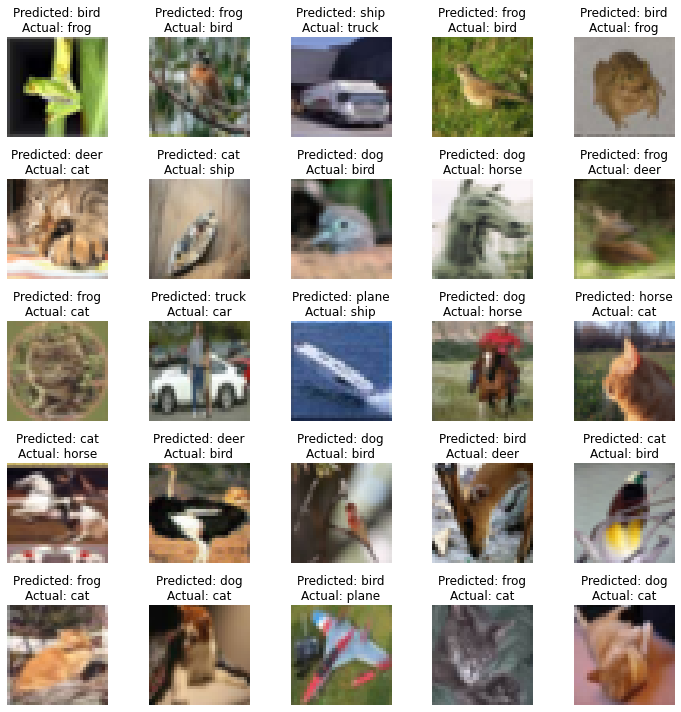

In [ ]:
plot_misclassified_images(misclassified_imgs, classes, "misclassified_images.png")

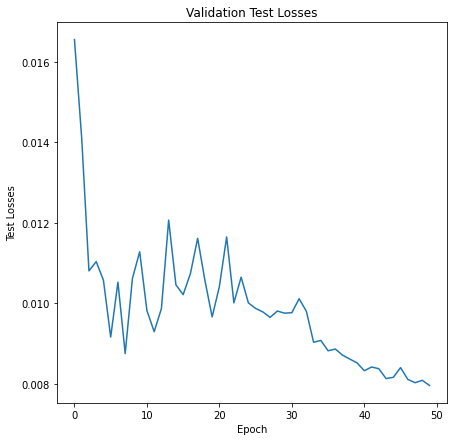

In [ ]:
plot_graph(test_losses, "Test Losses")

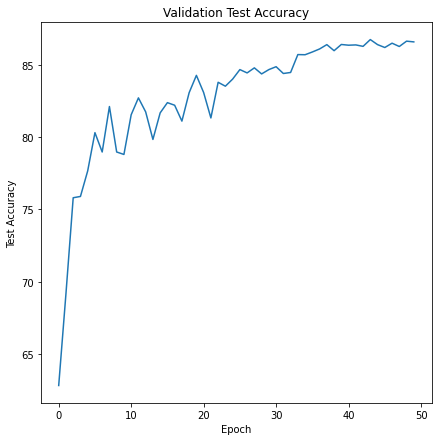

In [ ]:
plot_graph(test_accs, "Test Accuracy")